<a href="https://colab.research.google.com/github/lakshya897/project/blob/main/epilypsy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
%pip install PyWavelets
!pip install imbalanced-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 4.2 MB/s eta 0:00:00


In [6]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy.stats import skew, kurtosis
from scipy.fft import fft
import pywt
from imblearn.over_sampling import SMOTE


In [7]:
data = pd.read_csv("data.csv")

In [8]:
data.head(5)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [9]:
missing_rows = data[data.isnull().any(axis=1)]

In [10]:
print(missing_rows)

Empty DataFrame
Columns: [Unnamed: 0, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26, X27, X28, X29, X30, X31, X32, X33, X34, X35, X36, X37, X38, X39, X40, X41, X42, X43, X44, X45, X46, X47, X48, X49, X50, X51, X52, X53, X54, X55, X56, X57, X58, X59, X60, X61, X62, X63, X64, X65, X66, X67, X68, X69, X70, X71, X72, X73, X74, X75, X76, X77, X78, X79, X80, X81, X82, X83, X84, X85, X86, X87, X88, X89, X90, X91, X92, X93, X94, X95, X96, X97, X98, X99, ...]
Index: []

[0 rows x 180 columns]


In [11]:
data.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       ...
       'X170', 'X171', 'X172', 'X173', 'X174', 'X175', 'X176', 'X177', 'X178',
       'y'],
      dtype='object', length=180)

In [12]:
data.drop(['Unnamed: 0'],axis=1,inplace = True)

In [13]:
data.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


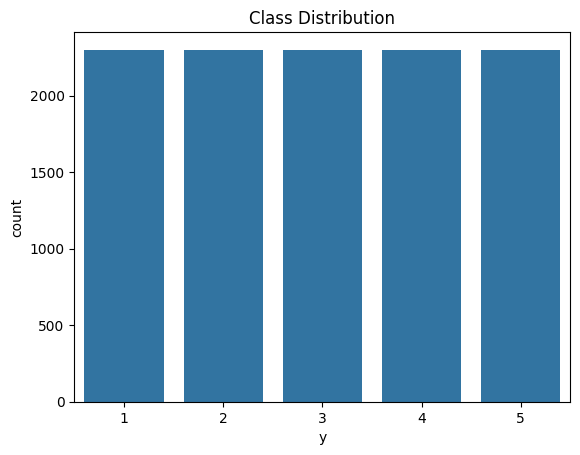

In [14]:
# Step 3: Exploratory Data Analysis
sns.countplot(x='y', data=data)
plt.title('Class Distribution')
plt.show()

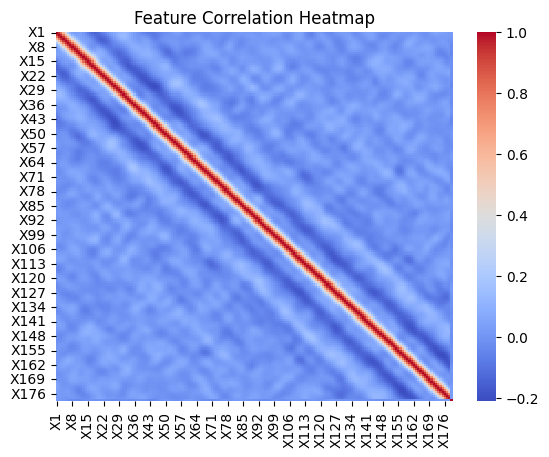

In [15]:
sns.heatmap(data.corr(), cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [16]:
# Step 4: Data Preprocessing
X = data.iloc[:, :-1]  # Features
y = data['y']          # Target

In [17]:
print(X)

        X1   X2   X3   X4   X5   X6   X7   X8   X9  X10  ...  X169  X170  \
0      135  190  229  223  192  125   55   -9  -33  -38  ...     8   -17   
1      386  382  356  331  320  315  307  272  244  232  ...   168   164   
2      -32  -39  -47  -37  -32  -36  -57  -73  -85  -94  ...    29    57   
3     -105 -101  -96  -92  -89  -95 -102 -100  -87  -79  ...   -80   -82   
4       -9  -65  -98 -102  -78  -48  -16    0  -21  -59  ...    10     4   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
11495  -22  -22  -23  -26  -36  -42  -45  -42  -45  -49  ...    20    15   
11496  -47  -11   28   77  141  211  246  240  193  136  ...   -94   -65   
11497   14    6  -13  -16   10   26   27   -9    4   14  ...   -42   -65   
11498  -40  -25   -9  -12   -2   12    7   19   22   29  ...   114   121   
11499   29   41   57   72   74   62   54   43   31   23  ...   -94   -59   

       X171  X172  X173  X174  X175  X176  X177  X178  
0       -15   -31   -77  -103  

In [18]:
print(y)

0        4
1        1
2        5
3        5
4        5
        ..
11495    2
11496    1
11497    5
11498    3
11499    4
Name: y, Length: 11500, dtype: int64


In [19]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [21]:
# Step 5: Feature Engineering
# Statistical Features (Mean, Std, Skew, Kurtosis)
def extract_statistical_features(data):
    mean = np.mean(data, axis=1)
    std = np.std(data, axis=1)
    skewness = skew(data, axis=1)
    kurt = kurtosis(data, axis=1)
    return np.column_stack([mean, std, skewness, kurt])


In [22]:
# Frequency Domain Features using FFT
def extract_frequency_features(data):
    fft_features = np.abs(fft(data))[:, :int(data.shape[1] // 2)]  # Take only positive frequencies
    return np.column_stack([np.mean(fft_features, axis=1), np.std(fft_features, axis=1)])


In [23]:
def extract_wavelet_features(data):
    wavelet_features = []
    for i in range(data.shape[0]):
        coeffs = pywt.wavedec(data[i], 'db1', level=4)  # Discrete Wavelet Transform
        # Collect mean values of each level of coefficients
        wavelet_features.append([np.mean(coeff) for coeff in coeffs])
    return np.array(wavelet_features)


In [24]:
# Combine all features
statistical_features = extract_statistical_features(X_scaled)
frequency_features = extract_frequency_features(X_scaled)
wavelet_features = extract_wavelet_features(X_scaled)


In [25]:
# Combine all features into one dataset
X_combined = np.hstack([statistical_features, frequency_features, wavelet_features])


In [26]:
# Check for missing values in the target
print("Missing values in target (y):", y.isnull().sum())


Missing values in target (y): 0


In [27]:
data = data.dropna(subset=['y'])  # Drop rows where 'y' is NaN
data['y'] = data['y'].fillna(data['y'].mode()[0])  # Replace NaN with the most frequent value


In [28]:
# Step 6: Model Training and Evaluation

# 1. Random Forest Classifier
print("Random Forest Classifier:")
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))

Random Forest Classifier:
Confusion Matrix:
 [[674   9   2  13   0]
 [ 35 371 183  27  69]
 [  7 185 366  23  99]
 [  7  12  13 509 147]
 [  0  49  70 126 454]]
Classification Report:
               precision    recall  f1-score   support

           1       0.93      0.97      0.95       698
           2       0.59      0.54      0.57       685
           3       0.58      0.54      0.56       680
           4       0.73      0.74      0.73       688
           5       0.59      0.65      0.62       699

    accuracy                           0.69      3450
   macro avg       0.68      0.69      0.68      3450
weighted avg       0.69      0.69      0.69      3450



In [29]:
# 2. Naive Bayes Classifier
print("\nNaive Bayes Classifier:")
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, nb_pred))
print("Classification Report:\n", classification_report(y_test, nb_pred))



Naive Bayes Classifier:
Confusion Matrix:
 [[571 123   1   3   0]
 [ 41 117  82  75 370]
 [  0  83 129 114 354]
 [  1 163 144 181 199]
 [  0  24  98  56 521]]
Classification Report:
               precision    recall  f1-score   support

           1       0.93      0.82      0.87       698
           2       0.23      0.17      0.20       685
           3       0.28      0.19      0.23       680
           4       0.42      0.26      0.32       688
           5       0.36      0.75      0.49       699

    accuracy                           0.44      3450
   macro avg       0.45      0.44      0.42      3450
weighted avg       0.45      0.44      0.42      3450



In [30]:
# 3. Decision Tree Classifier
print("\nDecision Tree Classifier:")
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_pred))
print("Classification Report:\n", classification_report(y_test, dt_pred))



Decision Tree Classifier:
Confusion Matrix:
 [[552  61  25  42  18]
 [ 39 280 177  56 133]
 [ 17 210 237  73 143]
 [ 24  84  82 359 139]
 [  5 140 139 161 254]]
Classification Report:
               precision    recall  f1-score   support

           1       0.87      0.79      0.83       698
           2       0.36      0.41      0.38       685
           3       0.36      0.35      0.35       680
           4       0.52      0.52      0.52       688
           5       0.37      0.36      0.37       699

    accuracy                           0.49      3450
   macro avg       0.50      0.49      0.49      3450
weighted avg       0.50      0.49      0.49      3450



In [31]:
# 4. K-Nearest Neighbors Classifier
print("\nK-Nearest Neighbors Classifier:")
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_pred))
print("Classification Report:\n", classification_report(y_test, knn_pred))



K-Nearest Neighbors Classifier:
Confusion Matrix:
 [[478 111  83  23   3]
 [  5 457 217   1   5]
 [  0 248 420   1  11]
 [  0 160 197 199 132]
 [  0 301 333   3  62]]
Classification Report:
               precision    recall  f1-score   support

           1       0.99      0.68      0.81       698
           2       0.36      0.67      0.47       685
           3       0.34      0.62      0.44       680
           4       0.88      0.29      0.43       688
           5       0.29      0.09      0.14       699

    accuracy                           0.47      3450
   macro avg       0.57      0.47      0.46      3450
weighted avg       0.57      0.47      0.46      3450



In [32]:
# 5. Support Vector Machine (SVM)
print("\nSupport Vector Machine (SVM):")
kernels = ['linear', 'rbf', 'poly']
for kernel in kernels:
    print(f"\nKernel: {kernel}")
    svm = SVC(kernel=kernel, random_state=42)
    svm.fit(X_train, y_train)
    svm_pred = svm.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, svm_pred))
    print("Classification Report:\n", classification_report(y_test, svm_pred))



Support Vector Machine (SVM):

Kernel: linear
Accuracy: 0.28
Classification Report:
               precision    recall  f1-score   support

           1       0.84      0.22      0.35       698
           2       0.24      0.33      0.28       685
           3       0.25      0.37      0.29       680
           4       0.28      0.26      0.27       688
           5       0.23      0.23      0.23       699

    accuracy                           0.28      3450
   macro avg       0.37      0.28      0.28      3450
weighted avg       0.37      0.28      0.28      3450


Kernel: rbf
Accuracy: 0.5527536231884058
Classification Report:
               precision    recall  f1-score   support

           1       0.93      0.95      0.94       698
           2       0.43      0.18      0.26       685
           3       0.46      0.27      0.34       680
           4       0.80      0.49      0.61       688
           5       0.37      0.85      0.51       699

    accuracy                     

In [33]:
# Setup for cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [34]:
# Random Forest Tuning
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
random_rf = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_grid_rf,
    n_iter=10,
    cv=kfold,
    n_jobs=-1,
    random_state=42
)
random_rf.fit(X_train, y_train)
print("Best parameters for Random Forest:", random_rf.best_params_)

Best parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None}


In [35]:
# Naive Bayes Tuning
param_grid_nb = {'var_smoothing': np.logspace(0, -9, num=50)}
random_nb = RandomizedSearchCV(GaussianNB(), param_distributions=param_grid_nb, n_iter=10, cv=kfold, n_jobs=-1)
random_nb.fit(X_train, y_train)
print("Best parameters for Naive Bayes:", random_nb.best_params_)

Best parameters for Naive Bayes: {'var_smoothing': 8.286427728546826e-09}


In [36]:
# KNN Tuning
param_grid_knn = {'n_neighbors': [3, 5, 7], 'metric': ['euclidean', 'manhattan']}
random_knn = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_grid_knn, n_iter=10, cv=kfold, n_jobs=-1)
random_knn.fit(X_train, y_train)
print("Best parameters for KNN:", random_knn.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for KNN: {'n_neighbors': 3, 'metric': 'euclidean'}


In [38]:
# SVM Tuning
param_grid_svm = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf']}
random_svm = RandomizedSearchCV(SVC(), param_distributions=param_grid_svm, n_iter=10, cv=kfold, n_jobs=-1)
random_svm.fit(X_train, y_train)
print("Best parameters for SVM:", random_svm.best_params_)

Best parameters for SVM: {'kernel': 'rbf', 'gamma': 'auto', 'C': 10}


In [39]:
import joblib  # For saving the model

In [40]:
# Step 6: Retrain and Evaluate Models
models = {
    "Random Forest": RandomForestClassifier(**random_rf.best_params_, random_state=42),
    "Naive Bayes": GaussianNB(**random_nb.best_params_),
    "KNN": KNeighborsClassifier(**random_knn.best_params_),
    "SVM": SVC(**random_svm.best_params_)
}

best_model_name = None
best_model = None
best_accuracy = 0
accuracies = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    print(f"\n{name} Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print(f"{name} Classification Report:\n", classification_report(y_test, y_pred))

    # Update best model if current model has the highest accuracy
    if acc > best_accuracy:
        best_accuracy = acc
        best_model_name = name
        best_model = model


Random Forest Confusion Matrix:
 [[676   6   4  12   0]
 [ 36 362 174  30  83]
 [  7 155 408  26  84]
 [  6   8  12 522 140]
 [  0  24  75 109 491]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           1       0.93      0.97      0.95       698
           2       0.65      0.53      0.58       685
           3       0.61      0.60      0.60       680
           4       0.75      0.76      0.75       688
           5       0.62      0.70      0.66       699

    accuracy                           0.71      3450
   macro avg       0.71      0.71      0.71      3450
weighted avg       0.71      0.71      0.71      3450


Naive Bayes Confusion Matrix:
 [[571 123   1   3   0]
 [ 41 117  82  75 370]
 [  0  83 129 114 354]
 [  1 163 144 181 199]
 [  0  24  98  56 521]]
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           1       0.93      0.82      0.87       698
           2       0.23      0

In [41]:
# Step 7: Save the Best Model
model_filename = f"{best_model_name.replace(' ', '_')}_best_model.pkl"
joblib.dump(best_model, model_filename)
print(f"\nBest model '{best_model_name}' saved as '{model_filename}'")


Best model 'Random Forest' saved as 'Random_Forest_best_model.pkl'


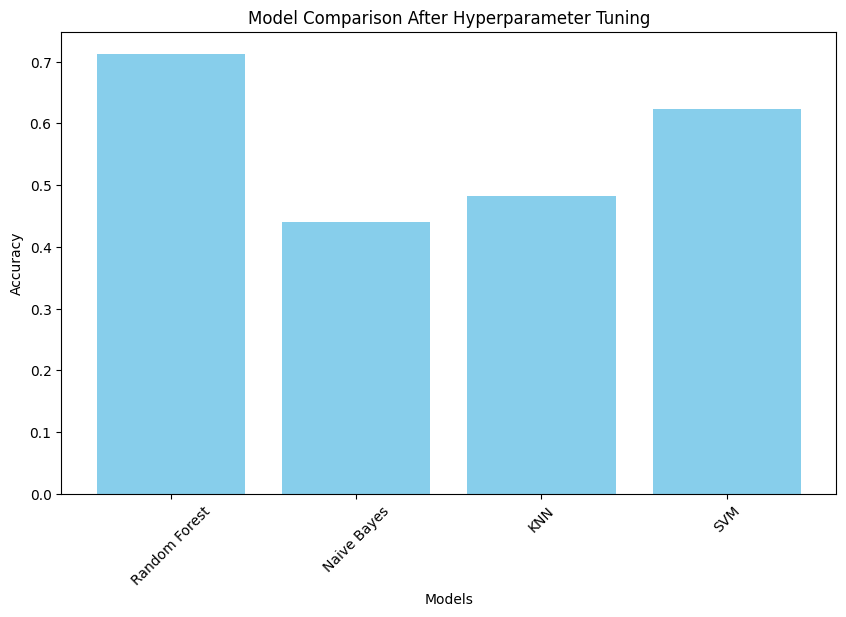

In [42]:
# Step 7: Model Comparison
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), accuracies, color='skyblue')
plt.title("Model Comparison After Hyperparameter Tuning")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.show()